In [216]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [217]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.head(7)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [218]:
x = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(537, 8) (537,)
(231, 8) (231,)


In [220]:
k = np.arange(1, 15)
train_score = np.empty(len(k))
test_score = np.empty(len(k))

In [221]:
def plot_compile_score(k, train_score, test_score):
    plt.title('compile score of k neighbors')
    plt.plot(k, train_score, 'b', label='train score')
    plt.plot(k, test_score, 'r', label='test score')
    plt.xlabel('k')
    plt.ylabel('score')
    plt.legend()
    plt.show()

61.471861471861466 1
71.42857142857143 2
69.26406926406926 3
73.59307359307358 4
74.89177489177489 5
74.02597402597402 6
74.89177489177489 7
74.89177489177489 8
74.89177489177489 9
75.32467532467533 10
75.32467532467533 11
75.32467532467533 12
74.89177489177489 13
74.89177489177489 14


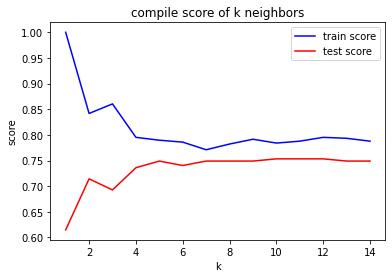

In [222]:
#find k to model
for i,n in enumerate(k):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    train_score[i] = knn.score(x_train, y_train)
    test_score[i] = knn.score(x_test, y_test)
    print(test_score[i]*100, n)
plot_compile_score(k, train_score, test_score)

In [223]:
knn = KNeighborsClassifier(n_neighbors=10)

In [224]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [225]:
y_pred = knn.predict(x_test)

In [226]:
classes = ["Not Diabetic", "Diabetic"]
accuracy = accuracy_score(y_test, y_pred)*100
report = classification_report(y_test, y_pred, target_names=classes)
print(report)
print("Accuracy: %.3f" % accuracy,"%")

              precision    recall  f1-score   support

Not Diabetic       0.77      0.90      0.83       157
    Diabetic       0.67      0.45      0.54        74

    accuracy                           0.75       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231

Accuracy: 75.325 %


In [227]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,141,16,157
1,41,33,74
All,182,49,231
